# Mod2 Project - Linear Regression Model

Third Notebook

## Now we move on to Modeling

With the hypothesis tests done, we move on to the model itself. Our goal is to make an accurate prediction based on the data collected and the features engineered.

In [100]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.dummy import DummyRegressor
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sys
from sklearn.linear_model import LassoCV
sys.path.append('../')
import helper as helper
sns.set(style="whitegrid")

plt.style.use('seaborn')

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 80)

%matplotlib inline

In [101]:
df = pd.read_csv('rookie.csv')
df['log_sal'] = np.log(df.salary)

# There needs to be separation 

Batters and pitchers need to be separated. Their statistics are causing problems for the model. 

In [102]:
pitch = df[df['prim_pos'].eq('P')]
bat = df[df['prim_pos'].ne('P')]

In [103]:
bat.head()

,Unnamed: 0,playerID,birthYear,nameFirst,nameLast,weight,height,debut,finalGame,award_winner,G,AB,R,H,DBL,TPL,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,OBP,BA,TB,SLG,OPS,salary,seasons,G_p,W_p,L_p,GS_p,CG,SHO_p,SV_p,IPouts,ER_p,HR_p,SO_p,IBB_p,BAOpp,ERA,WP,HBP_p,BK,BFP,GF,R_p,SH_p,SF_p,GIDP_p,WHIP,IP,BB_p,throws_R,bats_L,bats_R,prim_pos_2B,prim_pos_3B,prim_pos_C,prim_pos_OF,prim_pos_P,prim_pos_SS,throws,prim_pos,log_sal
2,2,abreuto01,1984.0,Tony,Abreu,200.0,70.0,2007-05-22,2014-07-28,0,48.666667,122.333333,11.666667,30.666667,8.333333,0.666667,1.000000,10.333333,0.666667,0.666667,4.666667,23.333333,0.333333,1.000000,0.000000,2.000000,4.333333,0.335772,0.251415,53.333333,0.379815,0.715586,745000.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0,0,0,0,0,R,2B,13.521139
4,4,ackledu01,1988.0,Dustin,Ackley,205.0,73.0,2011-06-17,2016-05-29,0,118.666667,441.333333,54.333333,108.333333,18.666667,3.666667,7.333333,39.000000,7.000000,2.000000,45.333333,91.666667,3.000000,0.333333,1.666667,1.666667,4.000000,0.320469,0.250526,186.000000,0.431767,0.752236,2600000.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,0,0,0,0,0,R,1B,14.771022
5,5,adamsma01,1988.0,Matt,Adams,245.0,75.0,2012-05-20,2020-07-29,0,92.333333,303.000000,36.333333,85.666667,18.000000,1.666667,11.333333,44.000000,1.000000,1.000000,18.000000,72.666667,1.666667,1.000000,0.000000,2.333333,7.000000,0.314210,0.272132,172.000000,0.548208,0.862418,1650000.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,0,0,0,0,0,R,1B,14.316286
12,12,alonsyo01,1987.0,Yonder,Alonso,230.0,73.0,2010-09-01,2019-09-29,0,74.666667,222.000000,19.333333,61.666667,15.000000,0.000000,4.666667,26.666667,1.000000,0.000000,24.000000,44.000000,3.000000,1.000000,0.333333,1.333333,5.666667,0.317584,0.269889,110.333333,0.491143,0.808727,1650000.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,0,0,0,0,0,R,1B,14.316286
13,13,altuvjo01,1990.0,Jose,Altuve,166.0,66.0,2011-07-20,2020-07-29,1,118.666667,474.333333,56.666667,135.000000,25.000000,2.333333,4.666667,33.666667,25.000000,9.000000,25.666667,62.666667,1.666667,3.333333,4.333333,4.333333,12.333333,0.317689,0.282899,210.666667,0.439014,0.756703,2500000.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,1,0,0,0,0,0,R,2B,14.731801


In [104]:
pitch = pitch[['playerID','award_winner','salary','seasons','G_p','W_p','L_p','GS_p','CG','SHO_p','SV_p','IPouts',
               'ER_p','HR_p','SO_p','IBB_p','BAOpp','ERA','WP','HBP_p','BK','BFP','GF','R_p','SH_p','SF_p','GIDP_p',
               'WHIP','IP','BB_p','throws_R','log_sal']]
bat = bat[['playerID','award_winner','salary','seasons','G','AB','R','H','DBL','TPL','HR','RBI','SB','CS','BB','SO',
           'IBB','HBP','SH','SF','GIDP','OBP','BA','TB','SLG','OPS','throws_R','bats_L','bats_R','prim_pos_2B',
           'prim_pos_3B','prim_pos_C','prim_pos_OF','prim_pos_P','prim_pos_SS','log_sal']]

In [105]:
print(pitch.shape)
print(bat.shape)


(495, 32)
(499, 36)


## First we look at batters

These models will only contain players whose primary position is not pitcher

In [106]:
bat.columns.values

array(['playerID', 'award_winner', 'salary', 'seasons', 'G', 'AB', 'R',
       'H', 'DBL', 'TPL', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB',
       'HBP', 'SH', 'SF', 'GIDP', 'OBP', 'BA', 'TB', 'SLG', 'OPS',
       'throws_R', 'bats_L', 'bats_R', 'prim_pos_2B', 'prim_pos_3B',
       'prim_pos_C', 'prim_pos_OF', 'prim_pos_P', 'prim_pos_SS',
       'log_sal'], dtype=object)

In [107]:
features = ['award_winner', 'seasons', 'G', 'AB', 'R',
       'H', 'DBL', 'TPL', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB',
       'HBP', 'SH', 'SF', 'GIDP', 'OBP', 'BA', 'TB', 'SLG', 'OPS',
       'throws_R', 'bats_L', 'bats_R', 'prim_pos_2B', 'prim_pos_3B',
       'prim_pos_C', 'prim_pos_OF', 'prim_pos_P', 'prim_pos_SS']

bat_con_cols = ['AB', 'R',
       'H', 'DBL', 'TPL', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB',
       'HBP', 'SH', 'SF', 'GIDP', 'OBP', 'BA', 'TB', 'SLG', 'OPS']
bat_cat_cols = ['seasons', 'G','throws_R', 'bats_L', 'bats_R', 'prim_pos_2B', 'prim_pos_3B',
       'prim_pos_C', 'prim_pos_OF', 'prim_pos_P', 'prim_pos_SS']

## Dummy Regressor

This model is simply the score to beat. Expected value is 0. 

In [108]:
y = bat['log_sal']
X = bat[features]

bat_features = bat[features]

dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X, y)
kelevin = dummy_regr.predict(X)
r2_score(y, kelevin)

0.0

In [109]:
target = bat.log_sal

X_train, X_test, y_train, y_test = train_test_split(bat[features], target,
                                                    random_state = 115, test_size = 0.2)

X_train_bat = helper.df_scaler(X_train,bat_con_cols)
X_test_bat = helper.df_scaler(X_test,bat_con_cols)
y_train_bat = helper.scaler(y_train)
y_test_bat = helper.scaler(y_test)

X_train_bat = X_train_bat.replace(np.nan,0)
X_test_bat = X_test_bat.replace(np.nan,0)
y_train_bat = y_train_bat.replace(np.nan,0)
y_test_bat = y_test_bat.replace(np.nan,0)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape) 
print("Testing set - Features: ", X_test.shape, "Target: ",y_test.shape)    

Training set - Features:  (399, 33) Target:  (399,)
Testing set - Features:  (100, 33) Target:  (100,)


In [110]:
lm = LinearRegression()
lm = lm.fit(X_train, y_train)
        
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

#print('The intercept is ' + str(lm.intercept_))
print('\n')
#print('The coefficients are ' + str(lm.coef_))
coef_df = pd.DataFrame()
coef_df['Features'] = X_train.columns
coef_df['Values'] = lm.coef_
model_coef = coef_df.sort_values(by='Values', ascending = False)

    
train_R2 = r2_score(y_train, y_pred_train)
test_R2 = r2_score(y_test, y_pred_test)


print('Train R2:', train_R2)
print(' Test R2:', test_R2)
print('\n')
print(model_coef)



Train R2: 0.43516989970968856
 Test R2: 0.30693575022955144


        Features    Values
0   award_winner  0.366987
19           OBP  0.261521
20            BA  0.145672
26        bats_R  0.119876
24      throws_R  0.075538
30   prim_pos_OF  0.046133
7            TPL  0.023573
11            CS  0.021460
12            BB  0.011385
9            RBI  0.009204
14           IBB  0.007606
21            TB  0.006242
5              H  0.004852
1        seasons  0.002936
3             AB  0.002479
10            SB  0.001715
31    prim_pos_P  0.000000
13            SO -0.002001
17            SF -0.002466
8             HR -0.003562
25        bats_L -0.004628
15           HBP -0.004856
2              G -0.008371
4              R -0.016807
6            DBL -0.027540
18          GIDP -0.027943
16            SH -0.028135
32   prim_pos_SS -0.072102
23           OPS -0.096050
29    prim_pos_C -0.101217
28   prim_pos_3B -0.158359
27   prim_pos_2B -0.162698
22           SLG -0.357571


In [111]:

lasso = Lasso(alpha=.01)
lasso.fit(X_train_bat, y_train_bat)

y_train_pred_lasso = lasso.predict(X_train_bat)
y_test_pred_lasso = lasso.predict(X_test_bat)

coef_df = pd.DataFrame()
coef_df['Features'] = X_train_bat.columns
coef_df['Values'] = lm.coef_
model_coef = coef_df.sort_values(by='Values', ascending = False)

trainr2 = r2_score(y_train_bat, y_train_pred_lasso)
testr2 = r2_score(y_test_bat, y_test_pred_lasso)
print('Training R2: '+ str(trainr2) )
print(' Testing R2: '+ str(testr2) )

print(model_coef)



Training R2: 0.4175947134121346
 Testing R2: 0.40363010685387724
        Features    Values
0   award_winner  0.366987
19         SB_sc  0.261521
20         CS_sc  0.145672
26         SF_sc  0.119876
24        HBP_sc  0.075538
30         TB_sc  0.046133
7    prim_pos_3B  0.023573
11   prim_pos_SS  0.021460
12         AB_sc  0.011385
9    prim_pos_OF  0.009204
14          H_sc  0.007606
21         BB_sc  0.006242
5         bats_R  0.004852
1        seasons  0.002936
3       throws_R  0.002479
10    prim_pos_P  0.001715
31        SLG_sc  0.000000
13          R_sc -0.002001
17         HR_sc -0.002466
8     prim_pos_C -0.003562
25         SH_sc -0.004628
15        DBL_sc -0.004856
2              G -0.008371
4         bats_L -0.016807
6    prim_pos_2B -0.027540
18        RBI_sc -0.027943
16        TPL_sc -0.028135
32        OPS_sc -0.072102
23        IBB_sc -0.096050
29         BA_sc -0.101217
28        OBP_sc -0.158359
27       GIDP_sc -0.162698
22         SO_sc -0.357571


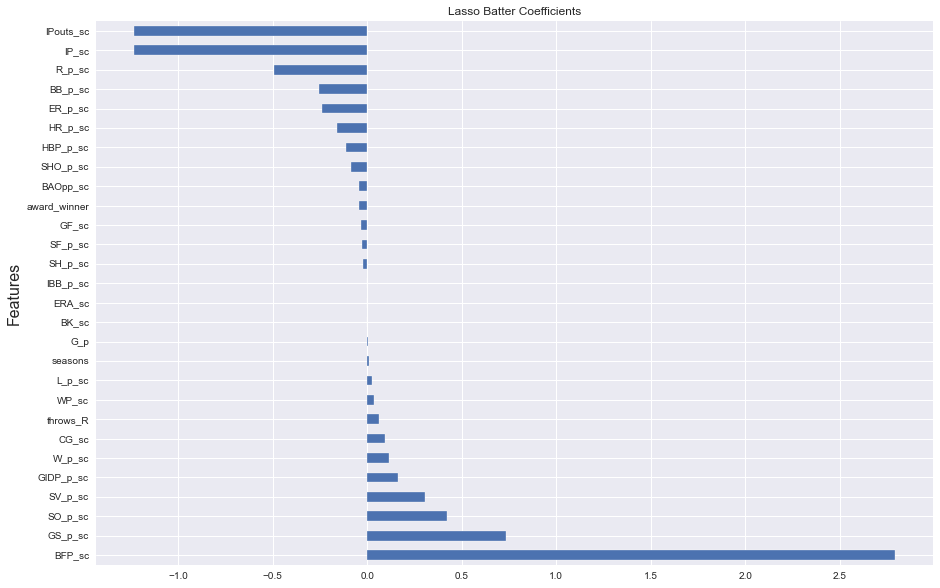

In [131]:
fig, ax = plt.subplots(figsize=(15,10))
model_coef.loc[model_coef['Values'] !=0].plot.barh(x='Features', y= 'Values', ax= ax, legend=False)
ax.set_ylabel('Features', fontsize=16)
ax.set_title('Lasso Batter Coefficients')

plt.savefig('PNG/lasso_batter_coef.png', dpi=300, 
            bbox_inches= 'tight', padding_inches = 4, transparent = True )

In [113]:
from sklearn import ensemble

In [114]:
GBest = ensemble.GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=3, max_features='sqrt',
                                               min_samples_leaf=15, min_samples_split=10, loss='huber')

In [115]:
GBest.fit(X_train_bat, y_train_bat)
y_train_pred_gb =  GBest.predict(X_train_bat)
y_pred_gb = GBest.predict(X_test_bat)


train_r2 = r2_score(y_train_bat, y_train_pred_gb)
test_r2 = r2_score(y_test_bat, y_pred_gb)
print('Train R^2: ' + str(train_r2))
print('Test R^2: ' + str(test_r2))


Train R^2: 0.9718683338512961
Test R^2: 0.27309407946518105


In [133]:
lassoCV_model = LassoCV(cv=5, random_state=42, n_jobs = -1)
lassoCV_model.fit(X_train_bat, y_train_bat)
trainr2 = lassoCV_model.score(X_train_bat, y_train_bat)
testr2 = lassoCV_model.score(X_test_bat, y_test_bat)

lassoCV_pred = lassoCV_model.predict(X_test_bat)
print('R2 of Train LassoCV: ', trainr2)
print('R2 of Test LassoCV: ', testr2)

R2 of Train LassoCV:  0.4064602172990849
R2 of Test LassoCV:  0.409611291786376


In [136]:
coef_df = pd.DataFrame()
coef_df['Features'] = X_train_bat.columns
coef_df['Values'] = lassoCV_model.coef_
model_coef = coef_df.sort_values(by='Values', ascending= False)
model_coef

,Features,Values
0,award_winner,0.392831
14,H_sc,0.175825
17,HR_sc,0.159579
18,RBI_sc,0.092812
16,TPL_sc,0.079949
20,CS_sc,0.060659
21,BB_sc,0.057106
23,IBB_sc,0.034763
19,SB_sc,0.010899
1,seasons,0.002722


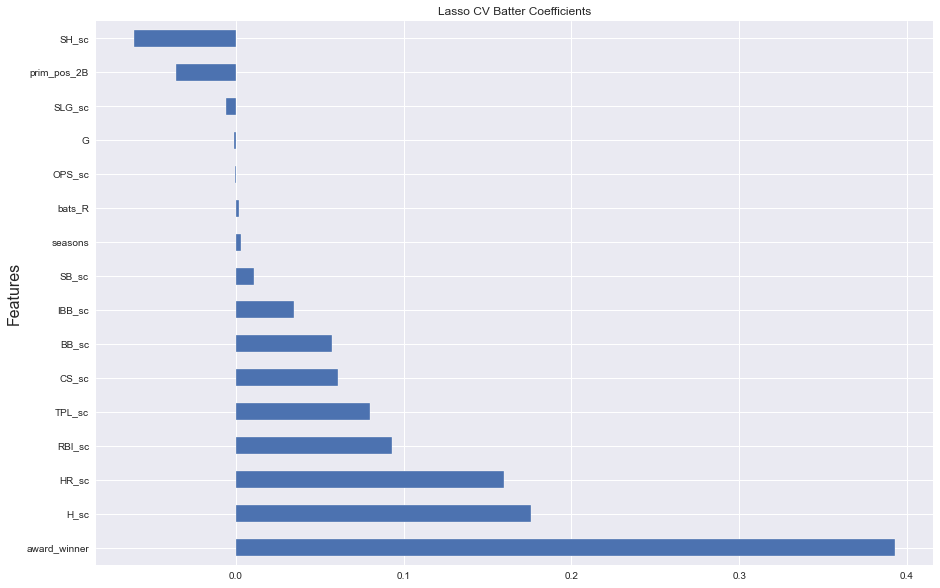

In [137]:
fig, ax = plt.subplots(figsize=(15,10))
model_coef.loc[model_coef['Values'] !=0].plot.barh(x='Features', y= 'Values', ax= ax, legend=False)
ax.set_ylabel('Features', fontsize=16)
ax.set_title('Lasso CV Batter Coefficients')

plt.savefig('PNG/lassocv_batter_coef.png', dpi=300, 
            bbox_inches= 'tight', padding_inches = 4, transparent = True )

## Next are the pitchers

In [138]:
features = ['award_winner',  'seasons', 'G_p', 'W_p',
       'L_p', 'GS_p', 'CG', 'SHO_p', 'SV_p', 'IPouts', 'ER_p', 'HR_p',
       'SO_p', 'IBB_p', 'BAOpp', 'ERA', 'WP', 'HBP_p', 'BK', 'BFP', 'GF',
       'R_p', 'SH_p', 'SF_p', 'GIDP_p', 'WHIP', 'IP', 'BB_p', 'throws_R']

pitch_con_cols = [ 'W_p',
       'L_p', 'GS_p', 'CG', 'SHO_p', 'SV_p', 'IPouts', 'ER_p', 'HR_p',
       'SO_p', 'IBB_p', 'BAOpp', 'ERA', 'WP', 'HBP_p', 'BK', 'BFP', 'GF',
       'R_p', 'SH_p', 'SF_p', 'GIDP_p', 'WHIP', 'IP', 'BB_p']
pitch_cat_cols = ['award_winner',  'seasons', 'G_p','throws_R']

In [139]:
y = pitch['log_sal']
X = pitch[features]

pitch_features = pitch[features]

dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X, y)
kelevin = dummy_regr.predict(X)
r2_score(y, kelevin)

0.0

In [140]:
target = pitch.log_sal

X_train, X_test, y_train, y_test = train_test_split(pitch[features], target,
                                                    random_state = 115, test_size = 0.2)

X_train_pitch = helper.df_scaler(X_train,pitch_con_cols)
X_test_pitch = helper.df_scaler(X_test,pitch_con_cols)
y_train_pitch = helper.scaler(y_train)
y_test_pitch = helper.scaler(y_test)

X_train_pitch = X_train_pitch.replace(np.nan,0)
X_test_pitch = X_test_pitch.replace(np.nan,0)
y_train_pitch = y_train_pitch.replace(np.nan,0)
y_test_pitch = y_test_pitch.replace(np.nan,0)

#check the shape of the results
print("Training set - Features: ", X_train_pitch.shape, "Target: ", y_train_pitch.shape) 
print("Testing set - Features: ", X_test_pitch.shape, "Target: ",y_test_pitch.shape)    

Training set - Features:  (396, 29) Target:  (396,)
Testing set - Features:  (99, 29) Target:  (99,)


In [141]:

lm = LinearRegression()
lm = lm.fit(X_train_pitch, y_train_pitch)
        
y_pred_train = lm.predict(X_train_pitch)
y_pred_test = lm.predict(X_test_pitch)

#print('The intercept is ' + str(lm.intercept_))
print('\n')
#print('The coefficients are ' + str(lm.coef_))
coef_df = pd.DataFrame()
coef_df['Features'] = X_train_pitch.columns
coef_df['Values'] = lm.coef_
model_coef = coef_df.sort_values(by='Values', ascending = False)

    
train_R2 = r2_score(y_train_pitch, y_pred_train)
test_R2 = r2_score(y_test_pitch, y_pred_test)


print('Train R2:', train_R2)
print(' Test R2:', test_R2)
print('\n')
print(model_coef)



Train R2: 0.412140149826022
 Test R2: 0.3676488910166855


        Features        Values
20        BFP_sc  2.790999e+00
6        GS_p_sc  7.323491e-01
13       SO_p_sc  4.196120e-01
9        SV_p_sc  3.032160e-01
25     GIDP_p_sc  1.631640e-01
4         W_p_sc  1.131061e-01
7          CG_sc  9.599150e-02
3       throws_R  6.322976e-02
17         WP_sc  3.450301e-02
5         L_p_sc  2.538870e-02
1        seasons  1.063027e-02
2            G_p  3.923606e-03
19         BK_sc  1.373906e-03
26       WHIP_sc  0.000000e+00
16        ERA_sc -2.589595e-14
14      IBB_p_sc -2.193468e-03
23       SH_p_sc -2.441163e-02
24       SF_p_sc -2.712873e-02
21         GF_sc -3.400044e-02
0   award_winner -4.286660e-02
15      BAOpp_sc -4.323536e-02
8       SHO_p_sc -8.770015e-02
18      HBP_p_sc -1.133934e-01
12       HR_p_sc -1.615231e-01
11       ER_p_sc -2.410872e-01
28       BB_p_sc -2.556628e-01
22        R_p_sc -4.923263e-01
27         IP_sc -1.233220e+00
10     IPouts_sc -1.233220e+00


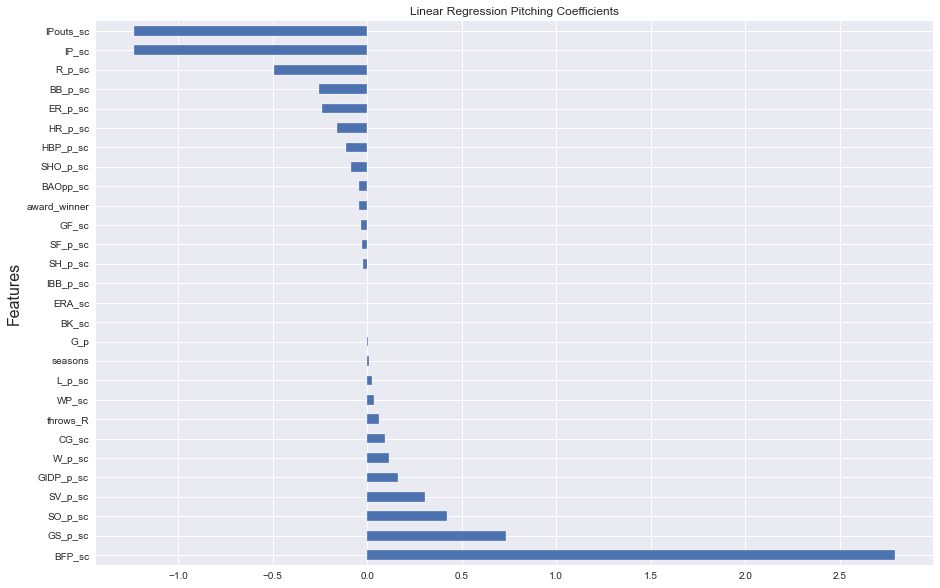

In [142]:
fig, ax = plt.subplots(figsize=(15,10))
model_coef.loc[model_coef['Values'] !=0].plot.barh(x='Features', y= 'Values', ax= ax, legend=False)
ax.set_ylabel('Features', fontsize=16)
ax.set_title('Linear Regression Pitching Coefficients')

plt.savefig('PNG/linreg_pitch_coef.png', dpi=300, 
            bbox_inches= 'tight', padding_inches = 4, transparent = True )

In [122]:

lasso = Lasso(alpha=.01, normalize=True)
lasso.fit(X_train_pitch, y_train_pitch)

y_train_pred_lasso = lasso.predict(X_train_pitch)
y_test_pred_lasso = lasso.predict(X_test_pitch)

coef_df = pd.DataFrame()
coef_df['Features'] = X_train_pitch.columns
coef_df['Values'] = lm.coef_
model_coef = coef_df.sort_values(by='Values', ascending = False)

trainr2 = r2_score(y_train_pitch, y_train_pred_lasso)
testr2 = r2_score(y_test_pitch, y_test_pred_lasso)
print('Training R2: '+ str(trainr2) )
print(' Testing R2: '+ str(testr2) )

print(model_coef)



Training R2: 0.2621797365382813
 Testing R2: 0.2513936501397459
        Features        Values
20        BFP_sc  2.790999e+00
6        GS_p_sc  7.323491e-01
13       SO_p_sc  4.196120e-01
9        SV_p_sc  3.032160e-01
25     GIDP_p_sc  1.631640e-01
4         W_p_sc  1.131061e-01
7          CG_sc  9.599150e-02
3       throws_R  6.322976e-02
17         WP_sc  3.450301e-02
5         L_p_sc  2.538870e-02
1        seasons  1.063027e-02
2            G_p  3.923606e-03
19         BK_sc  1.373906e-03
26       WHIP_sc  0.000000e+00
16        ERA_sc -2.589595e-14
14      IBB_p_sc -2.193468e-03
23       SH_p_sc -2.441163e-02
24       SF_p_sc -2.712873e-02
21         GF_sc -3.400044e-02
0   award_winner -4.286660e-02
15      BAOpp_sc -4.323536e-02
8       SHO_p_sc -8.770015e-02
18      HBP_p_sc -1.133934e-01
12       HR_p_sc -1.615231e-01
11       ER_p_sc -2.410872e-01
28       BB_p_sc -2.556628e-01
22        R_p_sc -4.923263e-01
27         IP_sc -1.233220e+00
10     IPouts_sc -1.233220e+00


In [143]:
GBest = ensemble.GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=3, max_features='sqrt',
                                               min_samples_leaf=15, min_samples_split=10, loss='huber')

In [144]:
GBest.fit(X_train_pitch, y_train_pitch)
y_train_pred_gb =  GBest.predict(X_train_pitch)
y_pred_gb = GBest.predict(X_test_pitch)


train_r2 = r2_score(y_train_pitch, y_train_pred_gb)
test_r2 = r2_score(y_test_pitch, y_pred_gb)
print('Train R^2: ' + str(train_r2))
print('Test R^2: ' + str(test_r2))


Train R^2: 0.9795737414529837
Test R^2: 0.20557102860038412


In [145]:
lassoCV_model = LassoCV(cv=5, random_state=42, n_jobs = -1)
lassoCV_model.fit(X_train_pitch, y_train_pitch)
trainr2 = lassoCV_model.score(X_train_pitch, y_train_pitch)
testr2 = lassoCV_model.score(X_test_pitch, y_test_pitch)

lassoCV_pred = lassoCV_model.predict(X_test_pitch)

coef_df = pd.DataFrame()
coef_df['Features'] = X_train_pitch.columns
coef_df['Values'] = lassoCV_model.coef_
model_coef = coef_df.sort_values(by='Values', ascending= False)
print('R2 of Train LassoCV: ', trainr2)
print('R2 of Test LassoCV: ', testr2)
print(model_coef)

R2 of Train LassoCV:  0.38048560644230156
R2 of Test LassoCV:  0.3332556665520553
        Features    Values
13       SO_p_sc  0.419051
9        SV_p_sc  0.265373
4         W_p_sc  0.159715
25     GIDP_p_sc  0.075338
0   award_winner  0.000000
16        ERA_sc  0.000000
27         IP_sc  0.000000
26       WHIP_sc  0.000000
23       SH_p_sc  0.000000
22        R_p_sc -0.000000
21         GF_sc  0.000000
20        BFP_sc  0.000000
19         BK_sc  0.000000
17         WP_sc  0.000000
14      IBB_p_sc -0.000000
1        seasons  0.000000
11       ER_p_sc -0.000000
10     IPouts_sc  0.000000
8       SHO_p_sc  0.000000
7          CG_sc  0.000000
6        GS_p_sc  0.000000
5         L_p_sc -0.000000
3       throws_R  0.000000
28       BB_p_sc -0.000000
2            G_p -0.007947
24       SF_p_sc -0.020496
15      BAOpp_sc -0.035532
18      HBP_p_sc -0.052133
12       HR_p_sc -0.057980


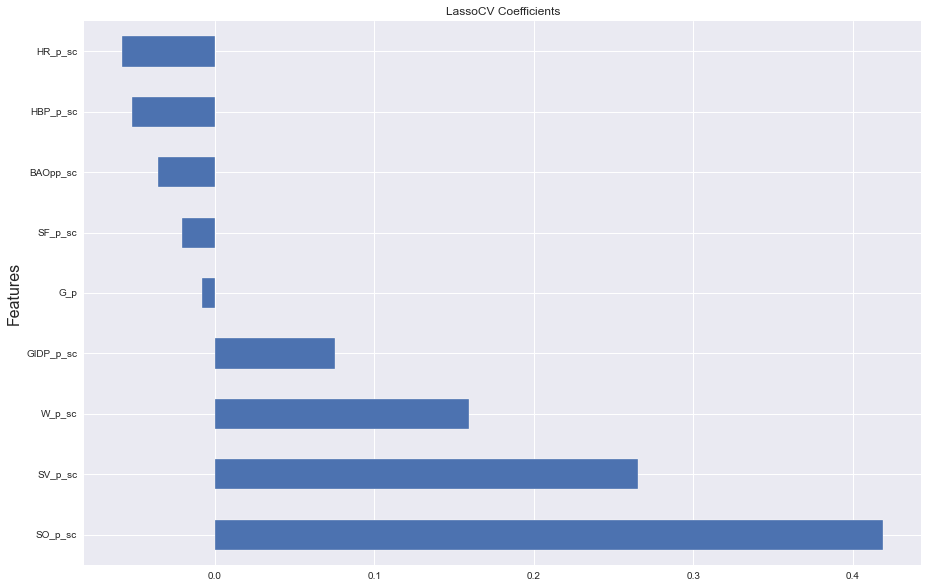

In [126]:
fig, ax = plt.subplots(figsize=(15,10))
model_coef.loc[model_coef['Values'] !=0].plot.barh(x='Features', y= 'Values', ax= ax, legend=False)
ax.set_ylabel('Features', fontsize=16)
ax.set_title('LassoCV Coefficients')

plt.savefig('PNG/lassocv_coef.png', dpi=300, 
            bbox_inches= 'tight', padding_inches = 4, transparent = True )